In [3]:
import pandas as pd
import numpy as np

In [4]:
df1=pd.read_csv(r'C:\Users\User\Downloads\weight-height.csv')

In [5]:
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [6]:
df1['Weight']

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

In [7]:
df1['Weight'].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [9]:
df1['Weight'].skew()

0.03295450444592437

In [10]:
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

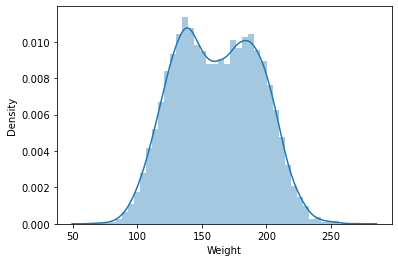

In [11]:
sns.distplot(df1['Weight'])

In [11]:
# Q1--> 25%
# Q3--->75%
# IQR--->Q3-Q1
# lower--->Q1-(1.5*IQR)
# lower--->Q3+(1.5*IQR)

In [12]:
q1=df1['Weight'].quantile(0.25)

In [13]:
q1

135.8180513055015

In [14]:
q1=np.round(q1,4)

In [15]:
q1

135.8181

In [16]:
q3=df1['Weight'].quantile(0.75)

In [17]:
q3

187.16952486868348

In [18]:
q3=np.round(q3,4)

In [19]:
q3

187.1695

In [20]:
iqr=q3-q1

In [21]:
iqr

51.35140000000001

In [22]:
iqr=np.round(iqr,4)

In [23]:
iqr

51.3514

In [24]:
low=q1-(1.5*iqr)

In [26]:
up=q3+(1.5*iqr)

In [27]:
low

58.791

In [28]:
up

264.1966

In [29]:
df1[df1['Weight']<low] # Not getting any outliers

,Gender,Height,Weight


In [30]:
df1[df1['Weight']>up] # Getting only one outlier

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [ ]:
# to complete further process we should have some errors so we altered the lower and upper values intentionally.

In [31]:
low_alter=75

In [32]:
up_alter=250

In [33]:
df1[df1['Weight']<low_alter]

,Gender,Height,Weight
5360,Female,55.668202,68.982530
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127
9566,Female,57.353093,72.750145


In [34]:
df1[df1['Weight']>up_alter]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1610,Male,76.617546,255.863326
2014,Male,78.998742,269.989699
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3285,Male,78.528210,253.889004
3669,Male,77.008336,251.425051
4331,Male,76.848761,254.209073


In [35]:
df1[(df1['Weight']<low_alter)|(df1['Weight']>up_alter)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1610,Male,76.617546,255.863326
2014,Male,78.998742,269.989699
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3285,Male,78.528210,253.889004
3669,Male,77.008336,251.425051
4331,Male,76.848761,254.209073
5360,Female,55.668202,68.982530
6624,Female,54.616858,71.393749


## Trimming the outliers

In [36]:
df2=df1[(df1['Weight']>low_alter)&(df1['Weight']<up_alter)]

In [37]:
df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [38]:
df1.shape

(10000, 3)

In [39]:
df2.shape

(9988, 3)

## Capping the outliers

In [40]:
df1['Weight']=np.where(df1['Weight']>up_alter,up_alter,np.where(df1['Weight']<low_alter,low_alter,df1['Weight']))

In [41]:
df1['Weight']

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

In [42]:
df1['Weight'].shape

(10000,)

In [43]:
df1[(df1['Weight']<low_alter)|(df1['Weight']>up_alter)] # No outliers now

,Gender,Height,Weight
